In [1]:
import wrangle
import explore
import model
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.api import Holt, ExponentialSmoothing


from sklearn.metrics import mean_squared_error
from math import sqrt 

### Choose your Airline

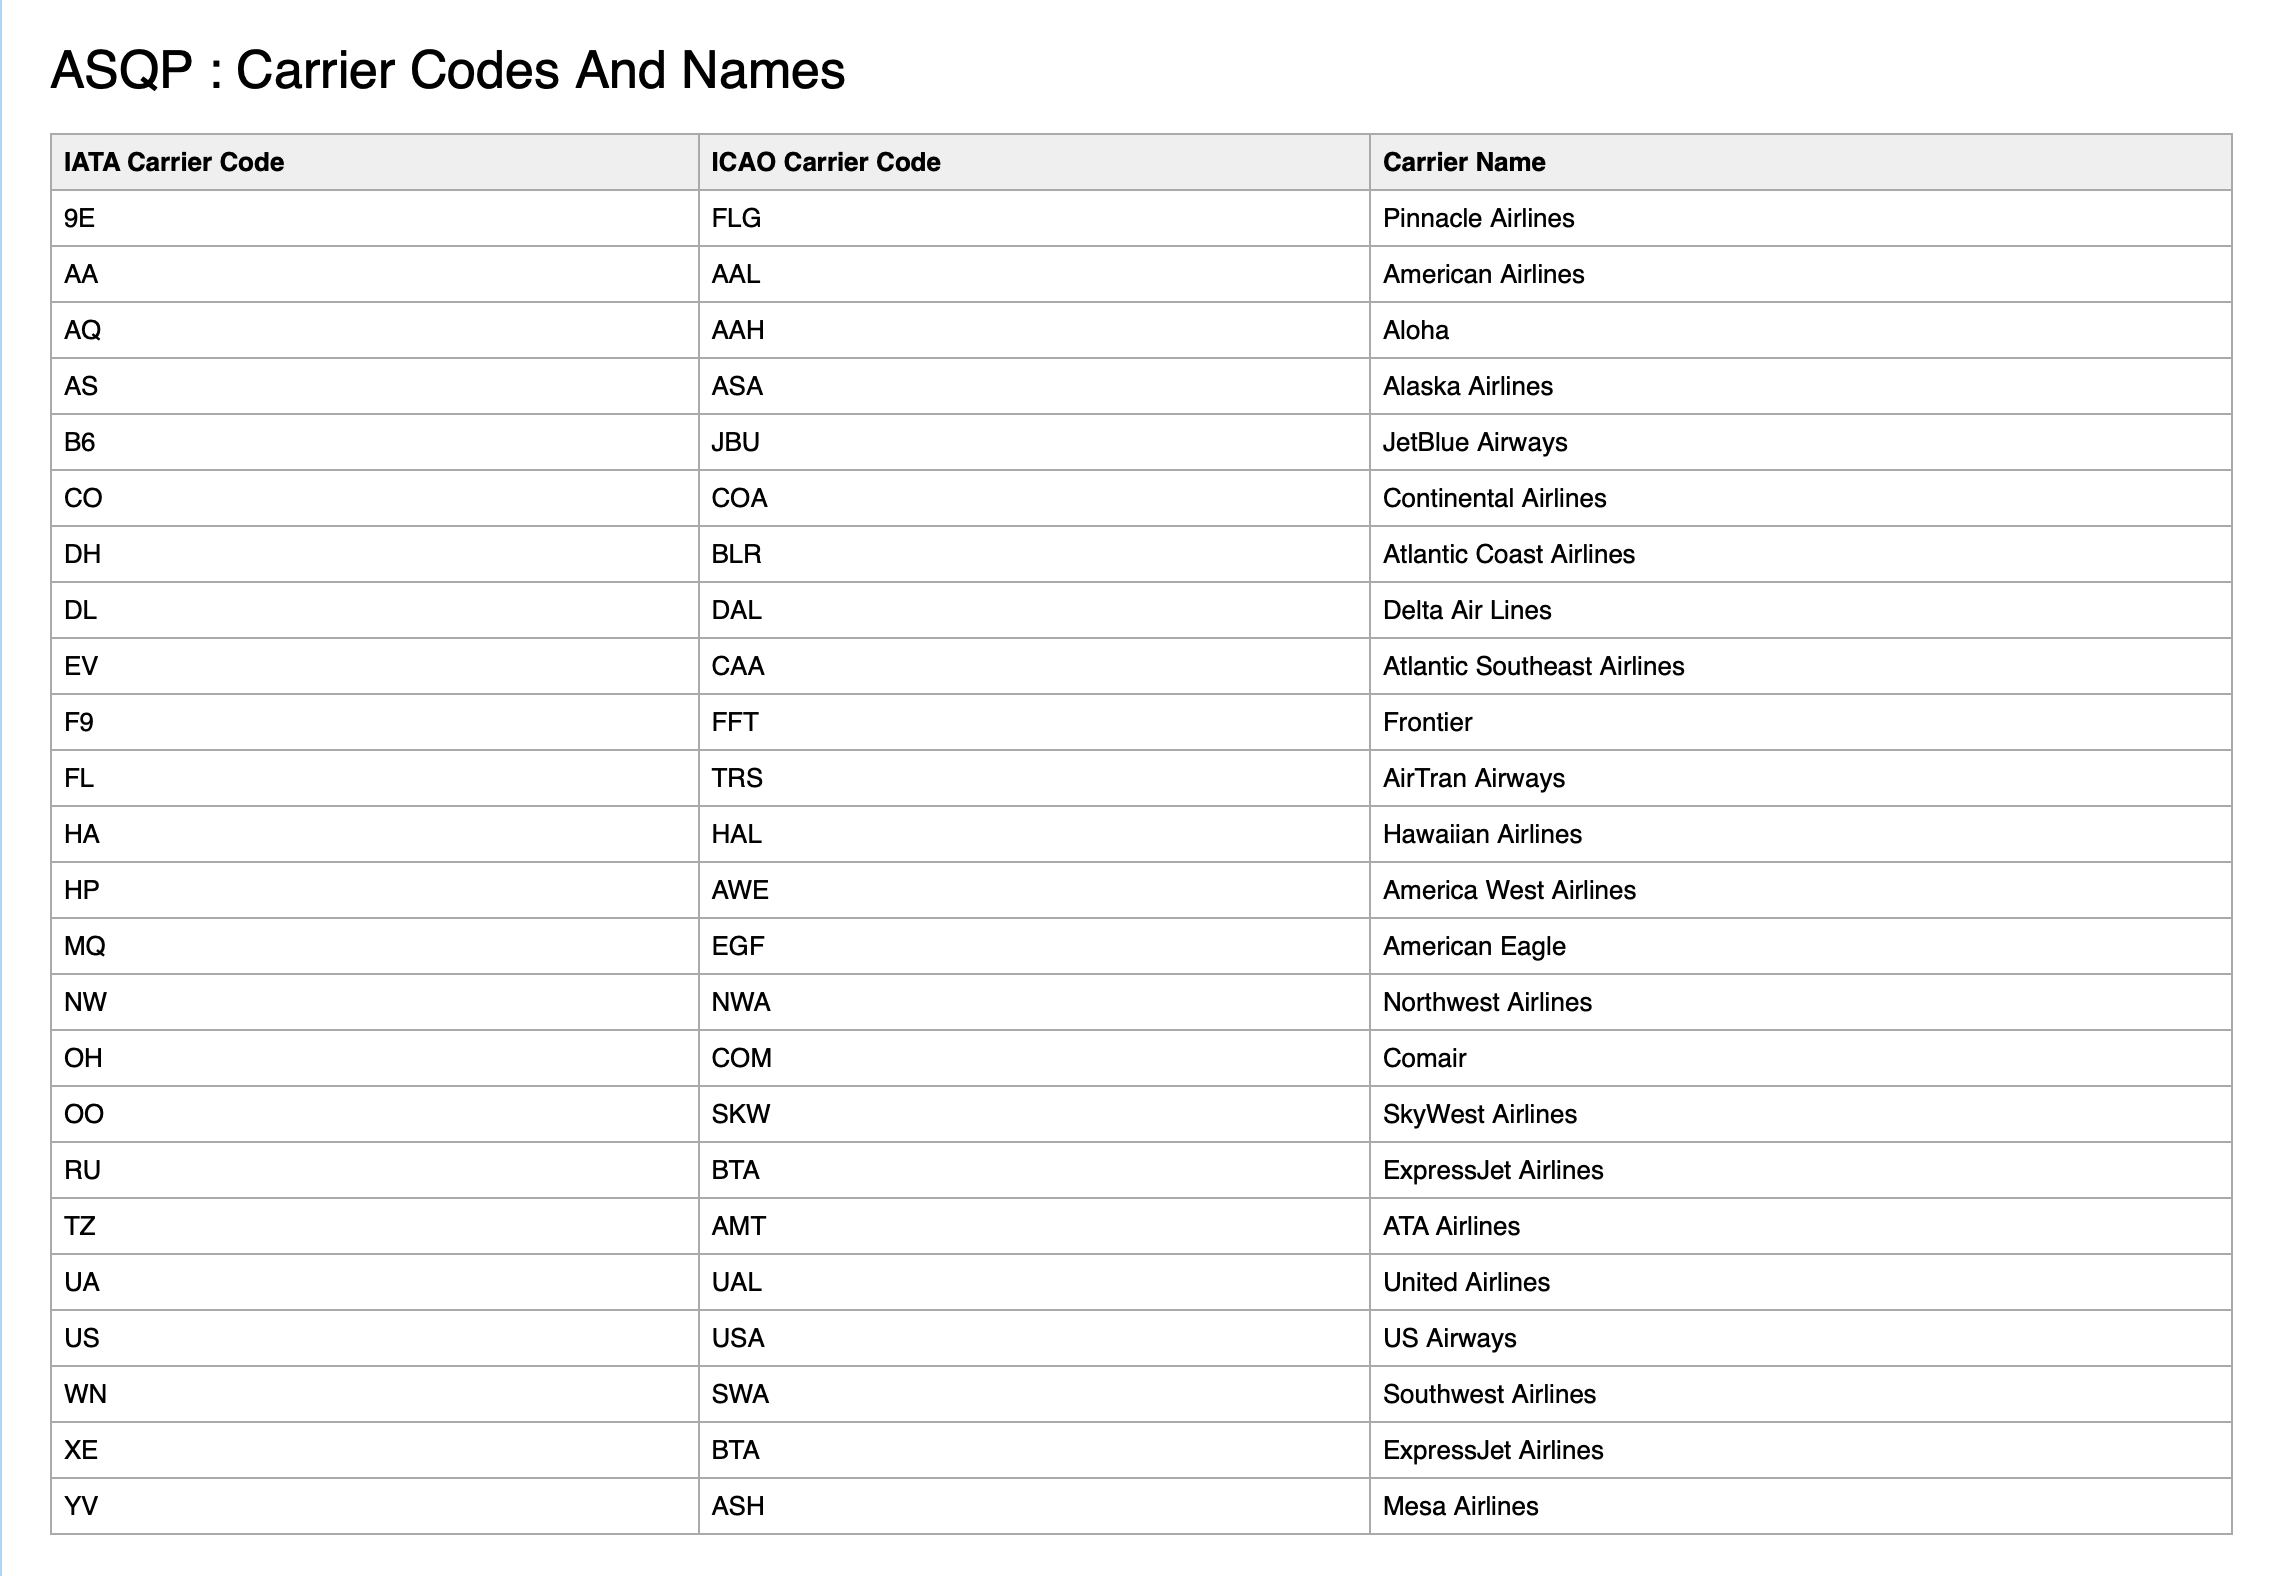

## Pull data from 10 csv's selecting the 7 columns shown out of 28 and specific to the airline passed in as the variable

In [2]:
flights = wrangle.pull_airline_data('UA')
flights

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3102,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3103,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3104,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3105,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3106,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7417301,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417302,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417303,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417304,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN


## Airline on time percentage

In [3]:
flights.CARRIER_DELAY.isna().sum()/len(flights)

0.8109386256164068

### Clean dataset imputing 0 for nulls as they represent no delay and combining all delays into one column AND then averaging the delay by day

In [4]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)
flights_daily_mean

,average_delay
FL_DATE,
2009-01-01,9.676707
2009-01-02,14.156364
2009-01-03,11.209040
2009-01-04,7.436530
2009-01-05,8.880218
...,...
2019-12-27,7.031214
2019-12-28,22.058198
2019-12-29,19.964902


## Plot average by varying time intervals

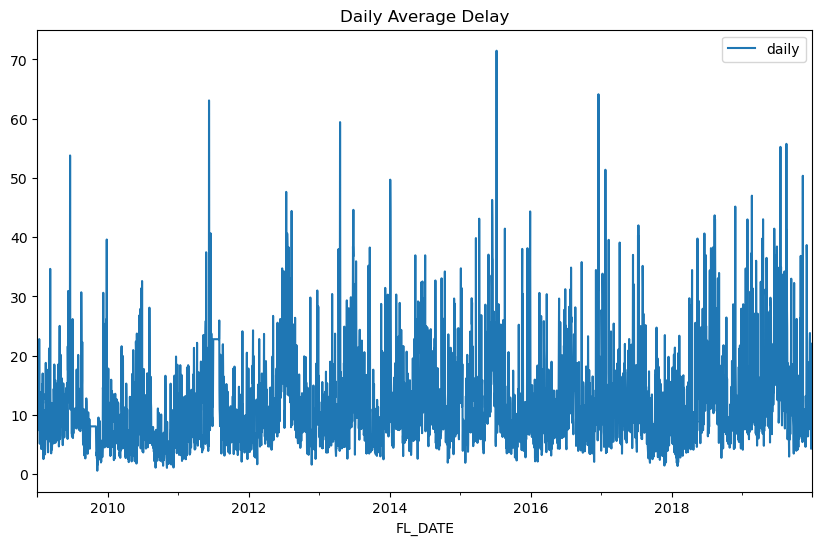

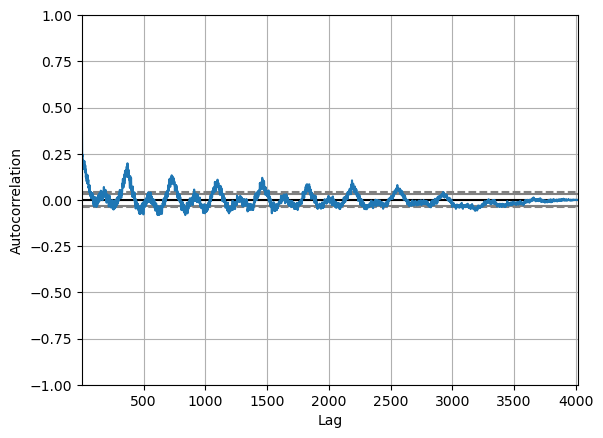

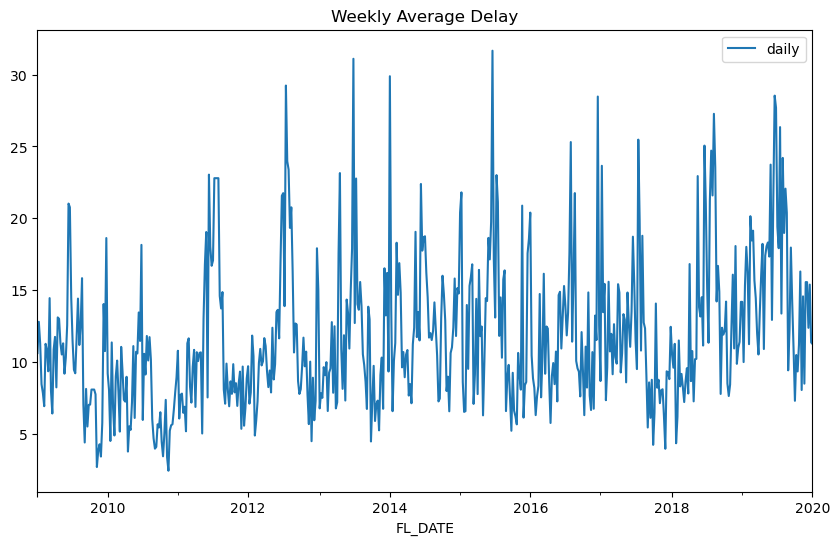

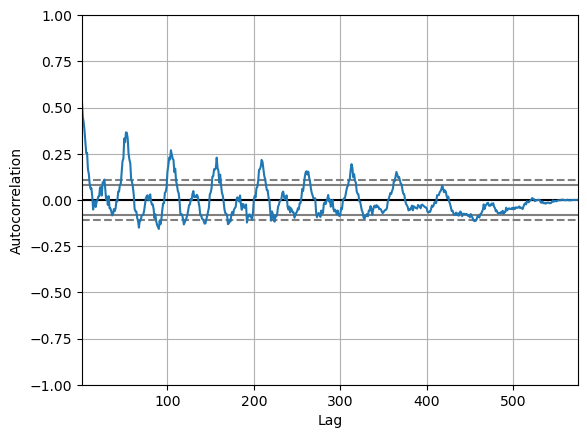

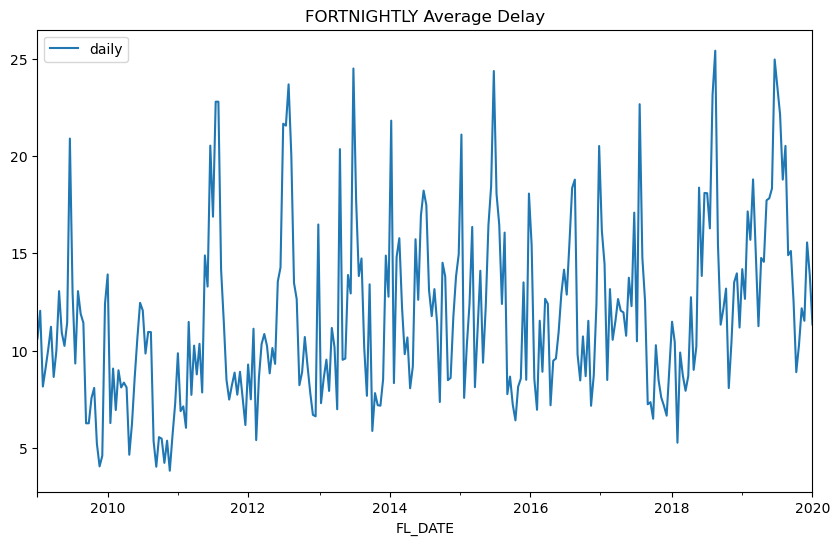

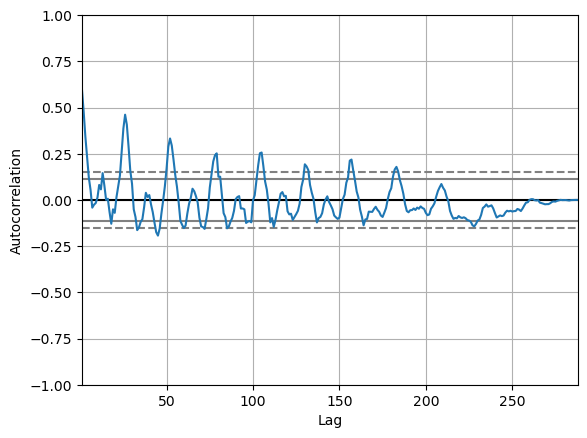

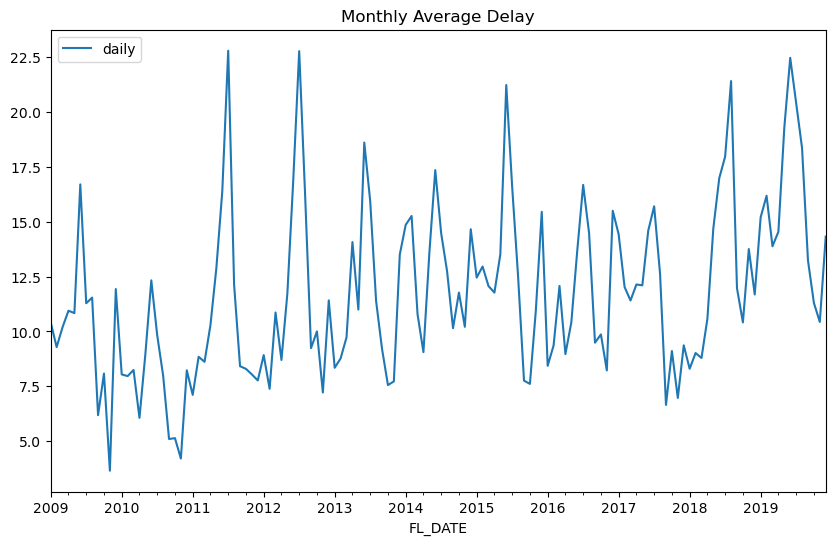

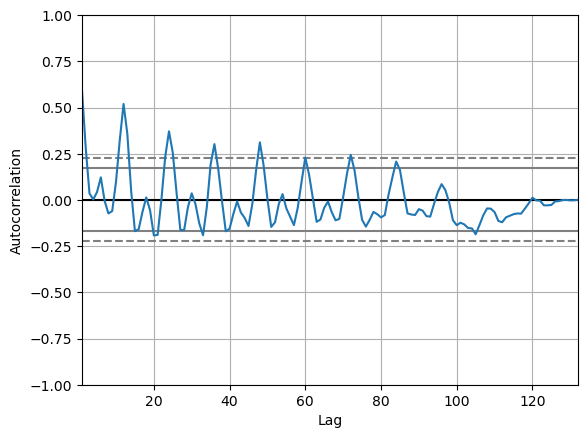

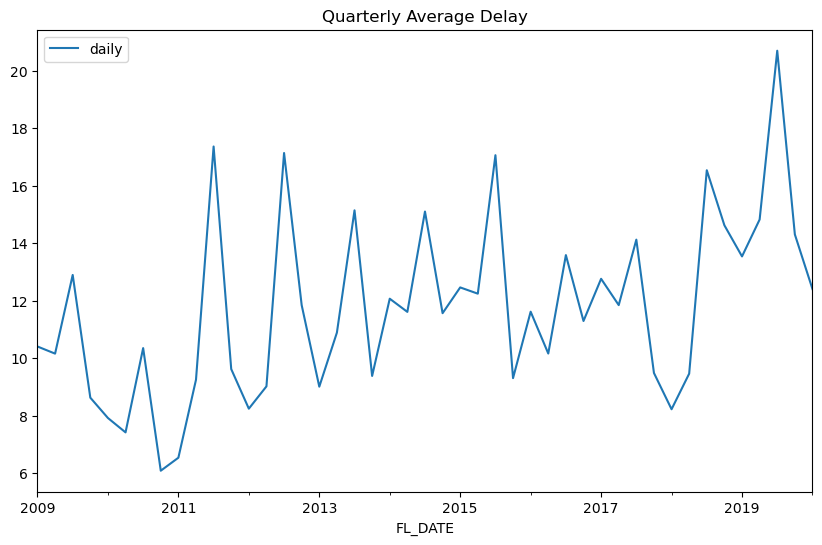

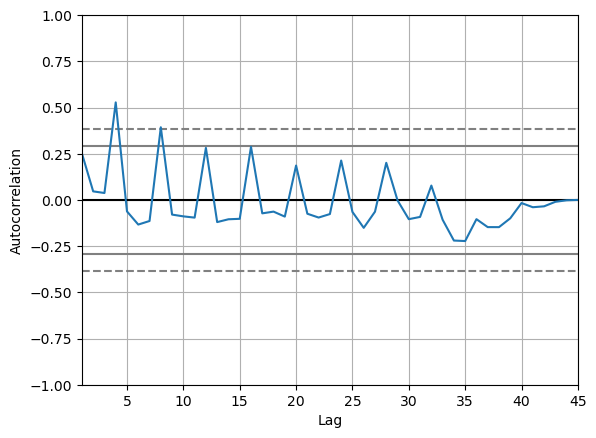

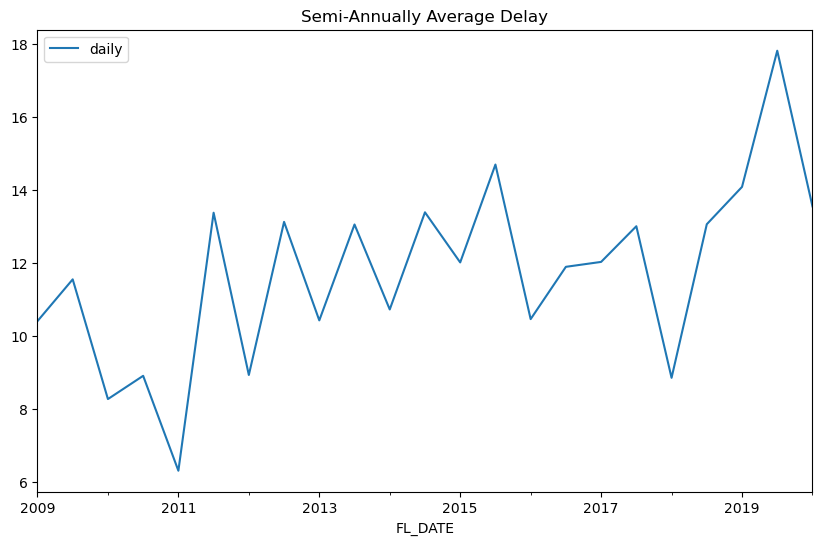

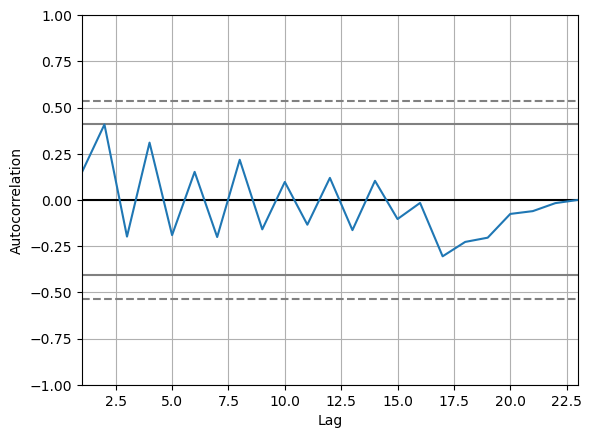

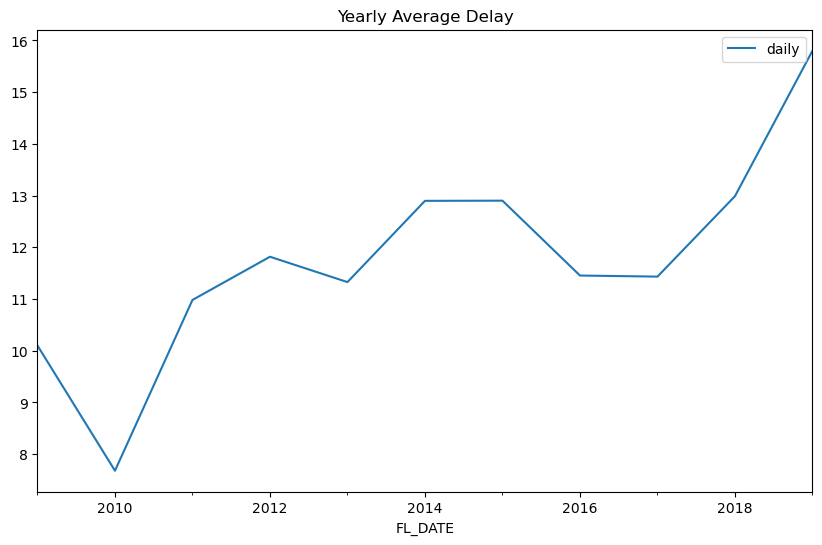

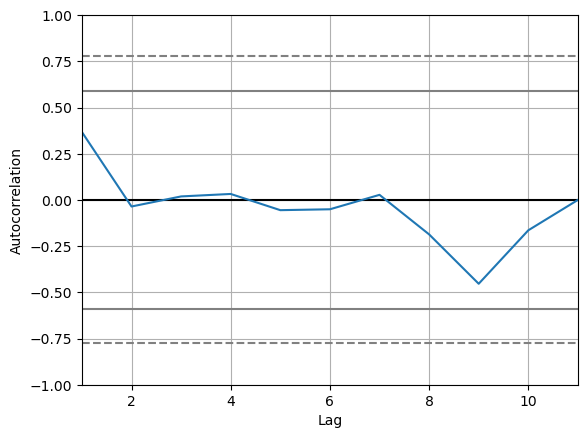

In [5]:
explore.plot_average_by_interval(flights_daily_mean)

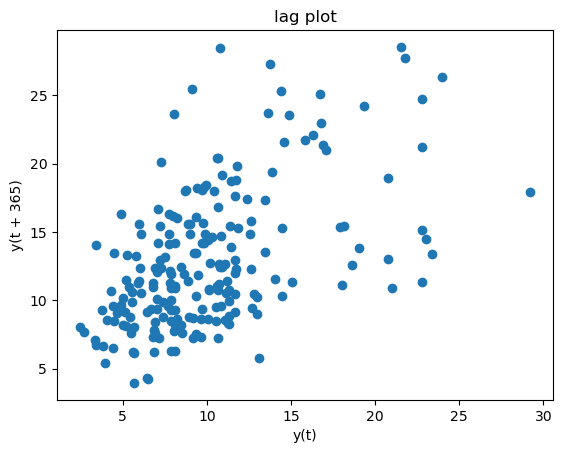

In [6]:
explore.plot_best_lag_plot(flights_daily_mean)

## Split

In [7]:
train, validate, test = model.train_test_split(flights_daily_mean, '2W')

In [8]:
train

,average_delay
FL_DATE,
2009-01-04,10.619660
2009-01-18,12.043650
2009-02-01,8.149865
2009-02-15,9.091530
2009-03-01,10.083955
...,...
2016-10-30,11.527966
2016-11-13,7.161314
2016-11-27,8.715790


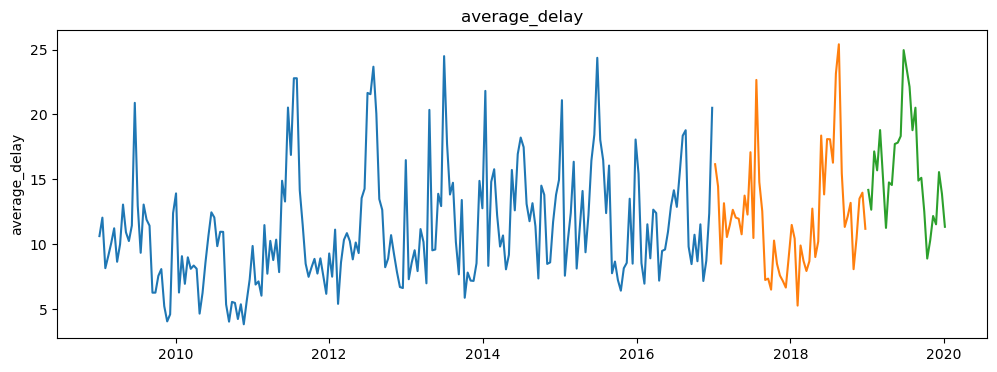

In [9]:
model.graph_split(train, validate, test)

## Seasonal Decomposition

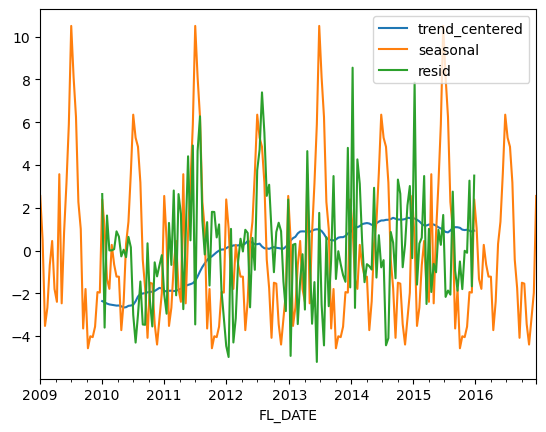

In [10]:
explore.seasonal_decomposition_plot(train, '2W')

### Make an empty evaluation df

In [11]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
yhat_df = pd.DataFrame(columns=['average_delay'])

average_delay -- RMSE: 9


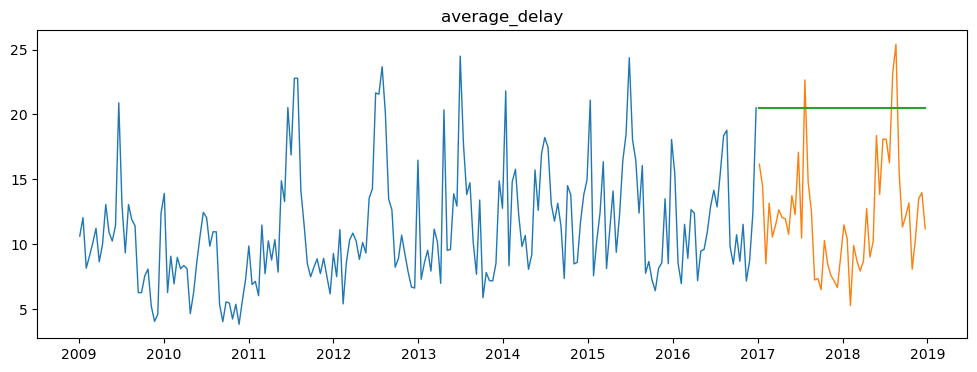

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38


In [12]:
eval_df = model.last_average_baseline(train, validate, yhat_df, eval_df)
eval_df

average_delay -- RMSE: 4


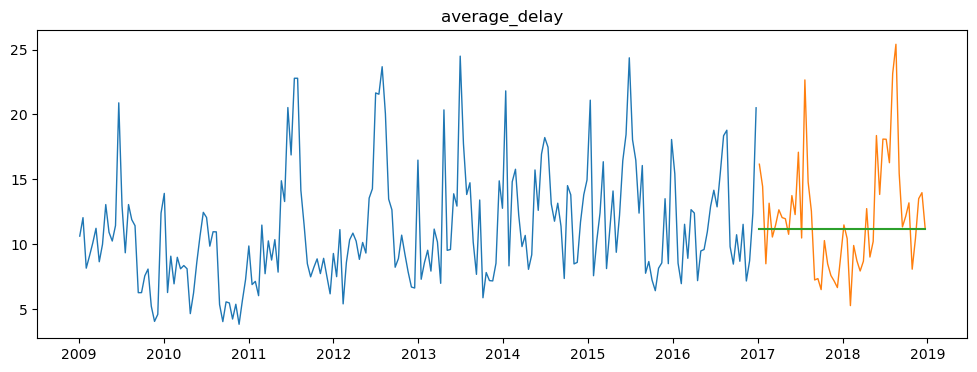

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38


In [13]:
eval_df = model.total_average_baseline(train, validate, yhat_df, eval_df)
eval_df

average_delay -- RMSE: 4


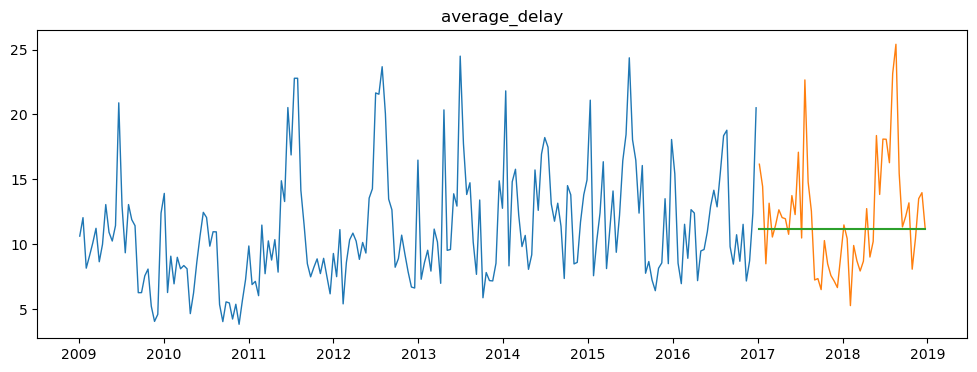

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,average_of_all_test_means,average_delay,4.38


In [14]:
eval_df = model.total_average_baseline(train, validate, yhat_df, eval_df)
eval_df

In [15]:
eval_df = model.rolling_average_baselines(train, validate, yhat_df, eval_df)
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,average_of_all_test_means,average_delay,4.38
0,rolling_average_of_1_fortnights,average_delay,9.37
0,rolling_average_of_2_fortnights,average_delay,6.04
0,rolling_average_of_6_fortnights,average_delay,4.32
0,rolling_average_of_13_fortnights,average_delay,4.29
0,rolling_average_of_26_fortnights,average_delay,4.29


#### Baseline RMSE = 4.29

### Holt's Linear Trend

average_delay -- RMSE: 6


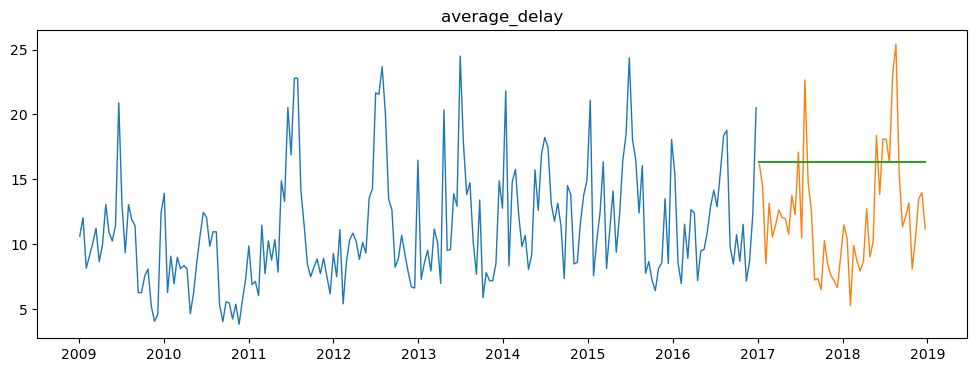

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,average_of_all_test_means,average_delay,4.38
0,rolling_average_of_1_fortnights,average_delay,9.37
0,rolling_average_of_2_fortnights,average_delay,6.04
0,rolling_average_of_6_fortnights,average_delay,4.32
0,rolling_average_of_13_fortnights,average_delay,4.29
0,rolling_average_of_26_fortnights,average_delay,4.29
0,holts_linear_trend,average_delay,5.98


In [17]:
eval_df = model.holt_linear(train, validate, yhat_df, eval_df)
eval_df

### Holt's Seasonal Trend

average_delay -- RMSE: 4


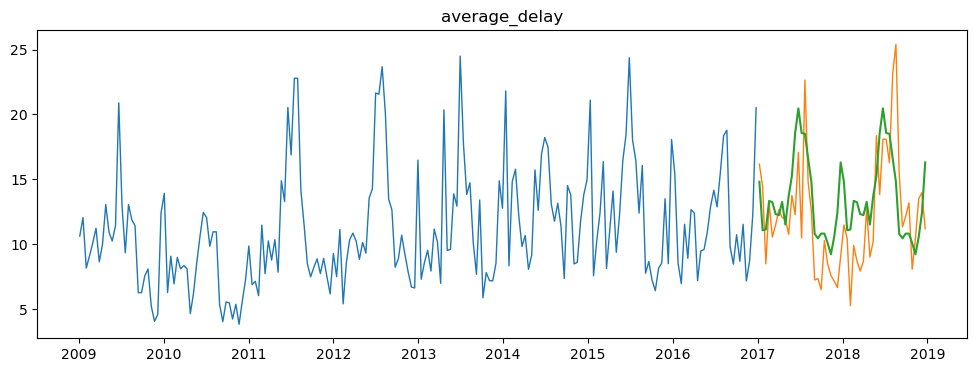

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,average_of_all_test_means,average_delay,4.38
0,rolling_average_of_1_fortnights,average_delay,9.37
0,rolling_average_of_2_fortnights,average_delay,6.04
0,rolling_average_of_6_fortnights,average_delay,4.32
0,rolling_average_of_13_fortnights,average_delay,4.29
0,rolling_average_of_26_fortnights,average_delay,4.29
0,holts_linear_trend,average_delay,5.98
0,holts_seasonal,average_delay,3.74


In [18]:
eval_df = model.holts_average_delay(train, validate, yhat_df, eval_df)
eval_df

### Previous Cycle

average_delay -- RMSE: 4


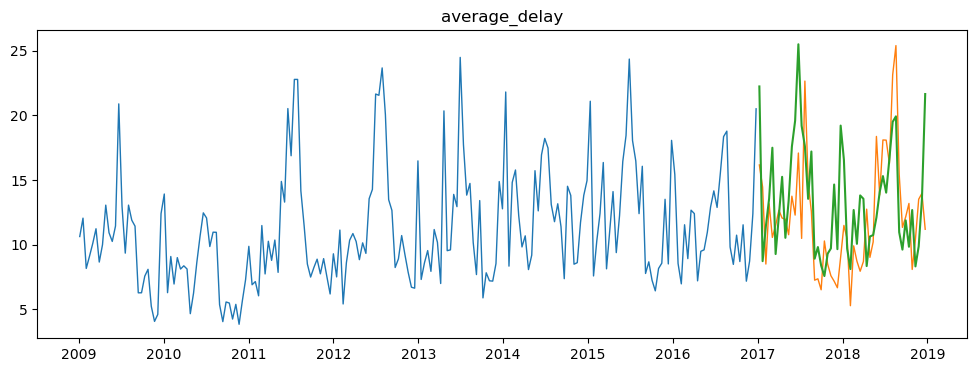

,model_type,target_var,rmse
0,last_observed_value,average_delay,9.38
0,average_of_all_test_means,average_delay,4.38
0,average_of_all_test_means,average_delay,4.38
0,rolling_average_of_1_fortnights,average_delay,9.37
0,rolling_average_of_2_fortnights,average_delay,6.04
0,rolling_average_of_6_fortnights,average_delay,4.32
0,rolling_average_of_13_fortnights,average_delay,4.29
0,rolling_average_of_26_fortnights,average_delay,4.29
0,holts_linear_trend,average_delay,5.98
0,holts_seasonal,average_delay,3.74


In [20]:
eval_df = model.previous_period(train, validate, yhat_df, eval_df)
eval_df

## Test

## Another look at trends and residuals

In [ ]:
sm.tsa.seasonal_decompose(train['average_delay']).plot()